In [7]:
# COGNIPATH ANALYTICS DASHBOARD
# Architected for: Educational Performance Metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# SETTING THE "ACADEMIC FUTURE" THEME
# Colors: Cyan (#00d2ff) & Slate (#3a7bd5)
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
primary_color = "#3a7bd5"
accent_color = "#00d2ff"

print("Dashboard Environment Loaded.")

Dashboard Environment Loaded.


In [9]:
# Load the results generated by main.py
try:
    df = pd.read_csv('model_results_for_dashboard.csv')
    print(f"Data Loaded Successfully: {df.shape[0]} Student Records")
    display(df.head())
except FileNotFoundError:
    print("Error: Please run 'python main.py' first to generate data.")

Data Loaded Successfully: 126000 Student Records


,age,study_hours,sleep_hours,Efficiency_Ratio,class_attendance,gender,course,sleep_quality,study_method,exam_difficulty,Attendance_Risk,Actual_Score,Predicted_Score
0,18,3.07,4.1,0.601961,88.3,other,b.sc,average,coaching,hard,Low Risk,51.3,64.641337
1,21,3.28,7.0,0.410000,49.6,male,b.com,poor,online videos,moderate,High Risk,50.6,43.760992
2,20,4.45,6.7,0.577922,42.5,female,bca,good,group study,moderate,High Risk,79.9,56.846678
3,21,4.19,5.7,0.625373,82.8,male,b.com,poor,mixed,hard,Low Risk,55.4,63.491008
4,21,1.31,8.5,0.137895,91.2,female,b.com,poor,mixed,easy,Low Risk,50.4,49.917283


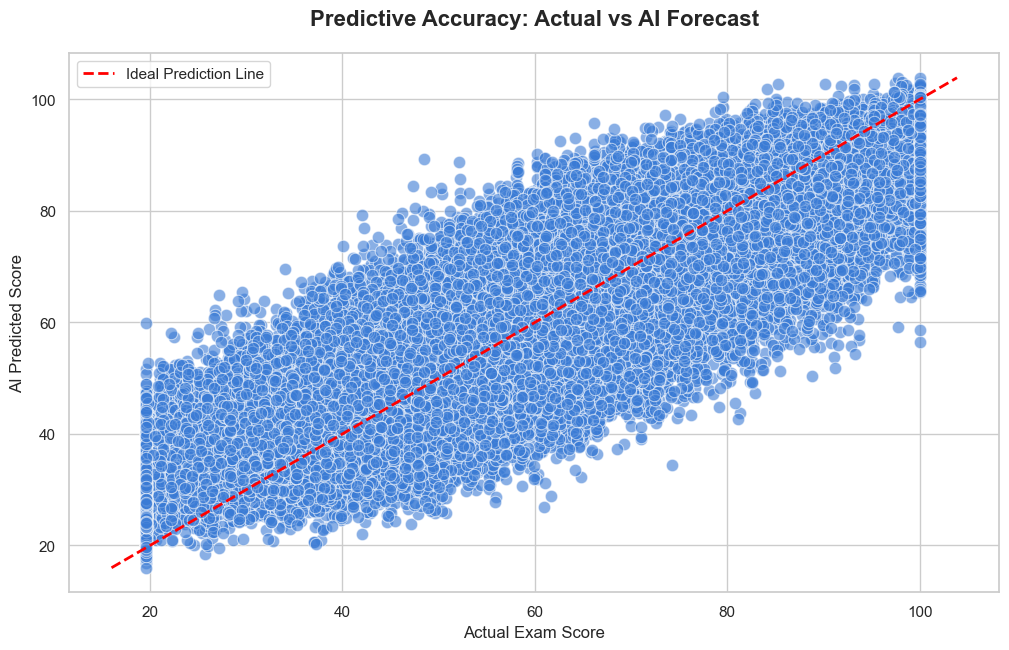

In [11]:
# VISUALIZATION 1: PREDICTION ACCURACY
plt.figure(figsize=(12, 7))

# Scatter plot with transparency
sns.scatterplot(x='Actual_Score', y='Predicted_Score', data=df, 
                color=primary_color, alpha=0.6, s=80, edgecolor='w')

# Perfect prediction line (The "Ideal Path")
min_val = min(df['Actual_Score'].min(), df['Predicted_Score'].min())
max_val = max(df['Actual_Score'].max(), df['Predicted_Score'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Ideal Prediction Line')

plt.title("Predictive Accuracy: Actual vs AI Forecast", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Actual Exam Score", fontsize=12)
plt.ylabel("AI Predicted Score", fontsize=12)
plt.legend()
plt.show()

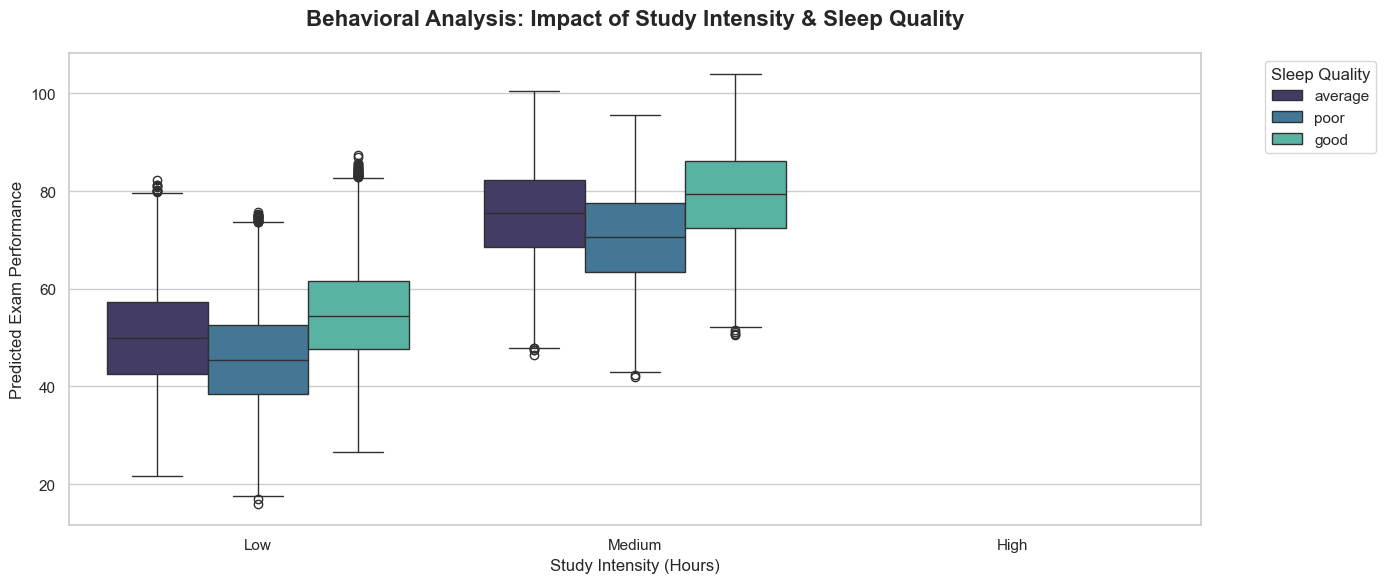

In [15]:
# VISUALIZATION 2: COGNITIVE IMPACT ANALYSIS
# Combining Sleep Hours & Study Hours into the chart

plt.figure(figsize=(14, 6))

# Create a segmentation for better visualization
df['Study_Intensity'] = pd.cut(df['study_hours'], bins=[0, 4, 8, 12], labels=['Low', 'Medium', 'High'])

sns.boxplot(x='Study_Intensity', y='Predicted_Score', hue='sleep_quality', 
            data=df, palette="mako")

plt.title("Behavioral Analysis: Impact of Study Intensity & Sleep Quality", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Study Intensity (Hours)", fontsize=12)
plt.ylabel("Predicted Exam Performance", fontsize=12)
plt.legend(title="Sleep Quality", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

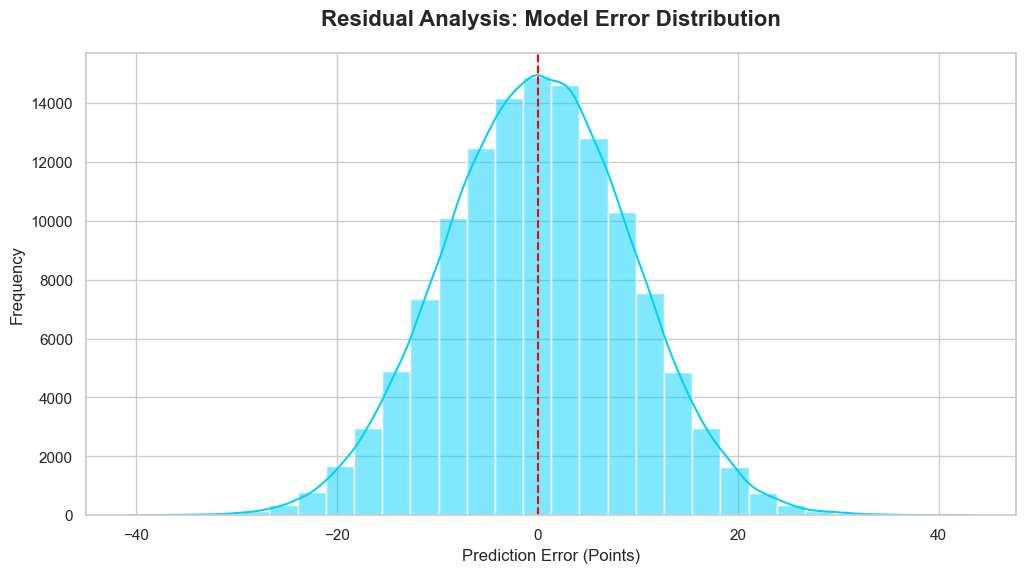

In [17]:
# VISUALIZATION 3: ERROR DISTRIBUTION (Quality Control)
# Shows where the model is making mistakes

df['Error'] = df['Actual_Score'] - df['Predicted_Score']

plt.figure(figsize=(12, 6))
sns.histplot(df['Error'], kde=True, color=accent_color, bins=30)
plt.axvline(0, color='red', linestyle='--')

plt.title("Residual Analysis: Model Error Distribution", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Prediction Error (Points)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

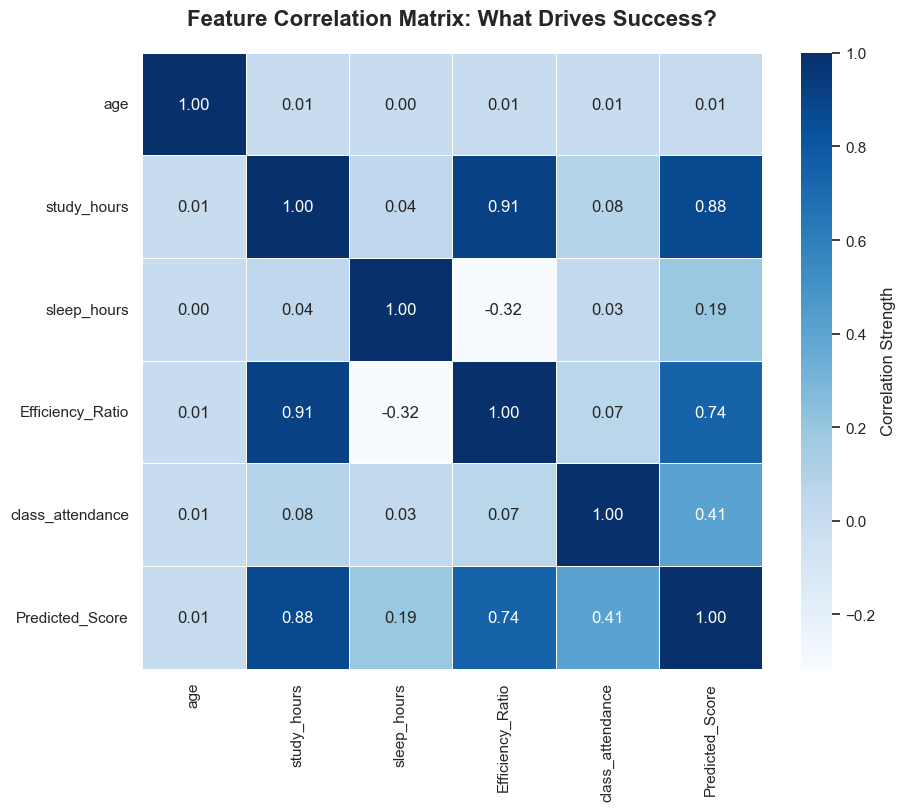

In [19]:
# VISUALIZATION 4: MULTI-VARIATE CORRELATION MATRIX
# Reveals hidden relationships between Study Hours, Sleep, and Scores.

plt.figure(figsize=(10, 8))

# Select only numerical columns for correlation
numerical_cols = ['age', 'study_hours', 'sleep_hours', 'Efficiency_Ratio', 'class_attendance', 'Predicted_Score']
corr_matrix = df[numerical_cols].corr()

# Plot Heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5, cbar_kws={'label': 'Correlation Strength'})

plt.title("Feature Correlation Matrix: What Drives Success?", fontsize=16, fontweight='bold', pad=20)
plt.show()

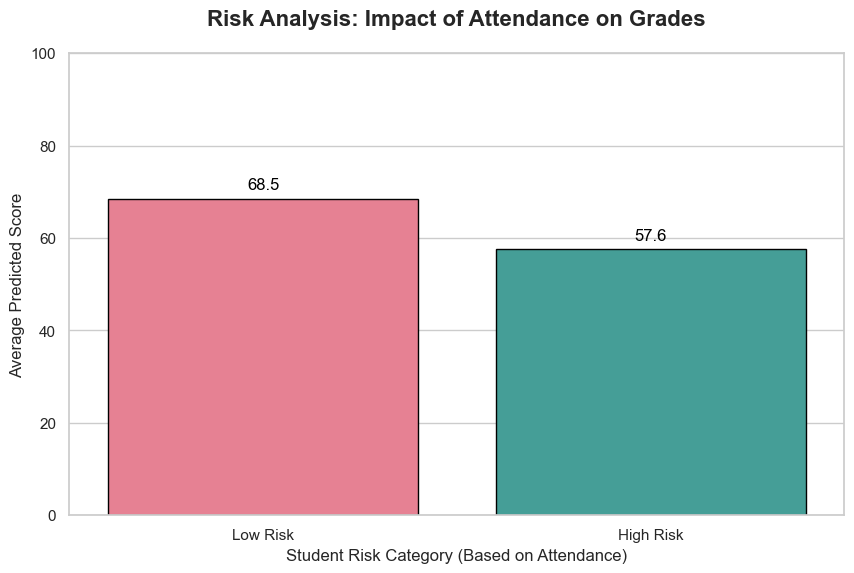

In [21]:
# VISUALIZATION 5: RISK SEGMENTATION ANALYSIS
# Comparing 'High Risk' vs 'Low Risk' attendance groups

plt.figure(figsize=(10, 6))

sns.barplot(x='Attendance_Risk', y='Predicted_Score', data=df, palette="husl", ci=None, edgecolor='black')

plt.title("Risk Analysis: Impact of Attendance on Grades", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Student Risk Category (Based on Attendance)", fontsize=12)
plt.ylabel("Average Predicted Score", fontsize=12)
plt.ylim(0, 100)

# Add value labels on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')

plt.show()